<a href="https://colab.research.google.com/github/SarahSaeedKhan/Tasks/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

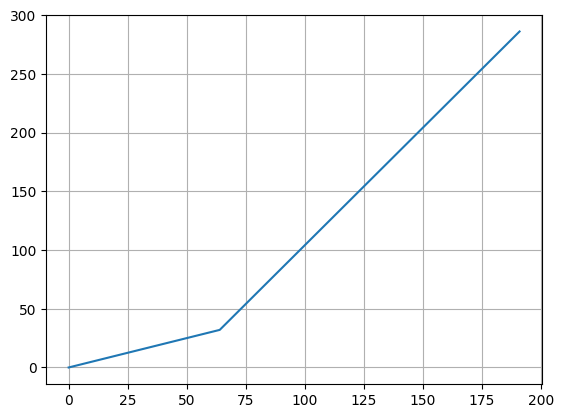

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

I = np.array([[209, 162, 255, 246],
              [232, 25, 248, 125],
              [33, 72, 0, 205],
              [255, 141, 249, 0]])

I = (I * 2) / np.max(I)

I_str = np.zeros_like(I)
row, col = I.shape
LT = 64  # The lower threshold value
UT = 64  # The upper threshold value

for i in range(row):
    for j in range(col):
        if I[i, j] <= LT:
            I_str[i, j] = 0.5 * I[i, j]
        elif I[i, j] <= UT:
            I_str[i, j] = 2 * (I[i, j] - LT) + 5 * LT
        else:
            I_str[i, j] = 0.5 * (I[i, j] - UT) + 0.5 * LT + 2 * (UT - LT)

dd = np.zeros(192)
dd[:64] = 0.5 * np.arange(64)
dd[64:192] = 2 * (np.arange(64, 192) - 64) + 0.5 * 64

plt.plot(dd)
plt.grid(True)
plt.show()


Q2. Implement a function that performs a power law transformation on an image. This function should take an 8‐bit grayscale image and the gamma value (γ) as arguments to transform the image. Let c=1 in your implementation. Try this function on the dark and the light image experimenting with different values for γ. Comment on what values of γ worked best for each image.

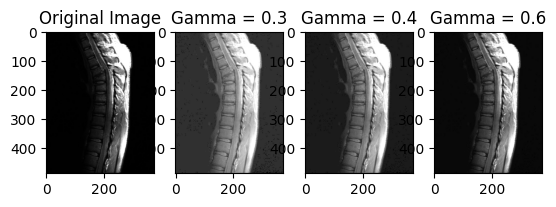

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_dark = cv2.imread('/content/spine.jpg', cv2.IMREAD_COLOR)
gamma_values = [0.3, 0.4, 0.6]
k = 1

plt.figure(1)
plt.subplot(1, 4, k)
plt.imshow(cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
k += 1

def powerlawtrans(image, gamma):
    gamma_correction = np.power(image / 255.0, gamma)
    gamma_corrected_image = np.uint8(gamma_correction * 255)
    return gamma_corrected_image

for gamma in gamma_values:
    img_transformed = powerlawtrans(img_dark, gamma)
    plt.subplot(1, 4, k)
    plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
    plt.title('Gamma = {:.1f}'.format(gamma))
    k += 1

plt.show()


Q3. Write the pseudocode for histogram equalization. Implement the histogram equalization function which performs histogram equalization on an 8-bit grayscale image. Try this function on the light and the dark image and comment on the obtained results.

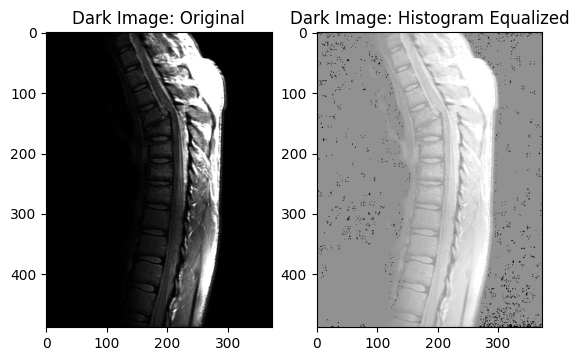

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equ(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)

    return equalized_image

dark = cv2.imread('/content/spine.jpg')
dark_equalize = histogram_equ(dark)

# Display the results
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dark, cv2.COLOR_BGR2RGB))
plt.title('Dark Image: Original')

plt.subplot(1, 2, 2)
plt.imshow(dark_equalize, cmap='gray')
plt.title('Dark Image: Histogram Equalized')

plt.show()


Question no 4

error: ignored

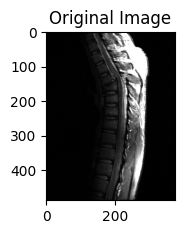

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/spine.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Add Gaussian noise to the image
noise_image = cv2.add(image, np.random.normal(0, 0.1, image.shape).astype(np.float32))

# Display the noisy image
plt.subplot(2, 2, 2)
plt.imshow(noise_image, cmap='gray')
plt.title('Noisy Image')

# Apply Laplacian mask
laplacian_mask = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]], dtype=np.float32)
enhanced_image = cv2.filter2D(noise_image, -1, laplacian_mask)

# Apply averaging mask
kernel_size = 5
averaging_mask = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
smoothed_image = cv2.filter2D(enhanced_image, -1, averaging_mask)

# Display the results
plt.subplot(1, 3, 1)
plt.imshow(noise_image, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1, 3, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.subplot(1, 3, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')

plt.tight_layout()
plt.show()


Question no 5

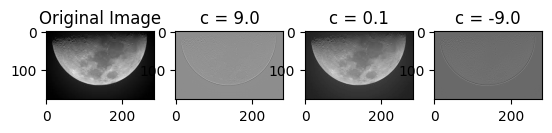

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian(image, c):
    # Apply Laplacian filter
    laplacian_img = cv2.Laplacian(image, cv2.CV_64F)
    # Scale the Laplacian result by the provided constant value
    sharp_img = image - c * laplacian_img
    # Normalize the sharp image to 0-255 range
    sharp_img = cv2.normalize(sharp_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return sharp_img

img = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)
c_values = [9, 0.1, -9]
k = 1

plt.figure(1)
plt.subplot(1, 4, k)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
k += 1

for c in c_values:
    sharp_img = laplacian(img, c)
    plt.subplot(1, 4, k)
    plt.imshow(sharp_img, cmap='gray')
    plt.title('c = {:.1f}'.format(c))
    k += 1

plt.show()


Question 6


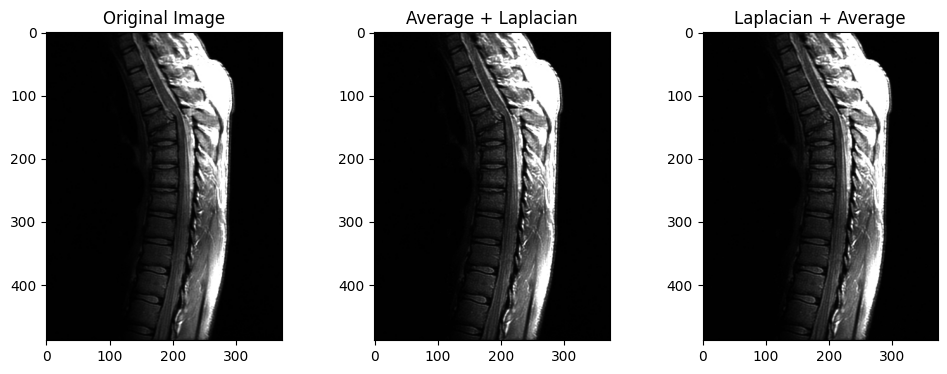

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_img = cv2.imread('/content/spine.jpg', cv2.IMREAD_COLOR)

avg_mask = np.ones((3, 3), dtype=np.float32) / 9
lap_mask = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)

smooth_img = cv2.filter2D(input_img, -1, avg_mask)
avg_lap_img = cv2.filter2D(smooth_img, -1, lap_mask)
avg_lap_img = cv2.add(input_img, avg_lap_img)

lap_img = cv2.filter2D(input_img, -1, lap_mask)

lap_avg_img = cv2.filter2D(lap_img, -1, avg_mask)
lap_avg_img = cv2.add(input_img, lap_avg_img)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(avg_lap_img, cv2.COLOR_BGR2RGB))
plt.title('Average + Laplacian')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lap_avg_img, cv2.COLOR_BGR2RGB))
plt.title('Laplacian + Average')

plt.show()


Moon image


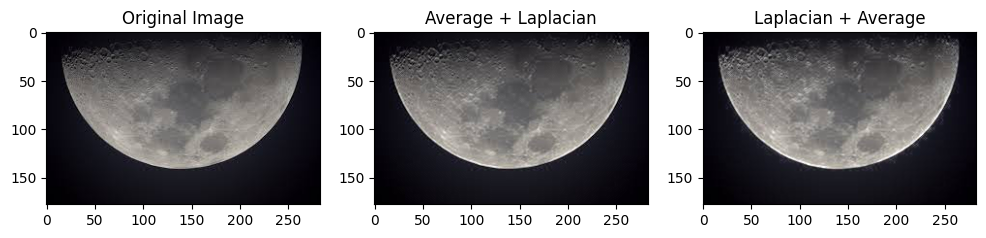

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_img = cv2.imread('/content/images.jpg', cv2.IMREAD_COLOR)

avg_mask = np.ones((3, 3), dtype=np.float32) / 9
lap_mask = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)

smooth_img = cv2.filter2D(input_img, -1, avg_mask)
avg_lap_img = cv2.filter2D(smooth_img, -1, lap_mask)
avg_lap_img = cv2.add(input_img, avg_lap_img)

lap_img = cv2.filter2D(input_img, -1, lap_mask)

lap_avg_img = cv2.filter2D(lap_img, -1, avg_mask)
lap_avg_img = cv2.add(input_img, lap_avg_img)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(avg_lap_img, cv2.COLOR_BGR2RGB))
plt.title('Average + Laplacian')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lap_avg_img, cv2.COLOR_BGR2RGB))
plt.title('Laplacian + Average')

plt.show()


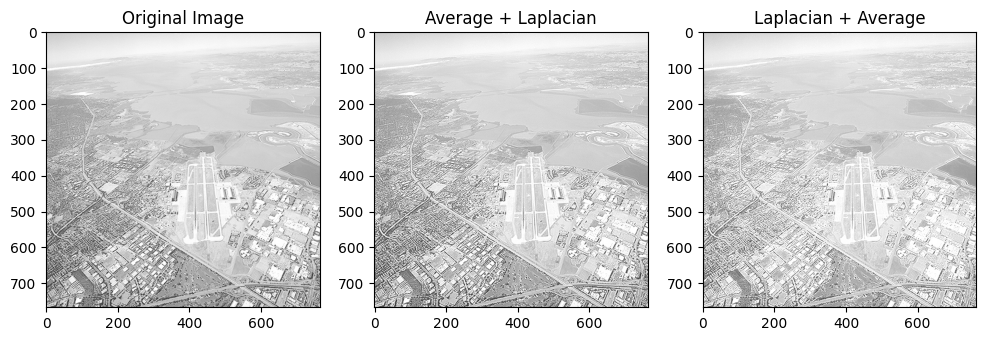

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_img = cv2.imread('/content/runway.jpg', cv2.IMREAD_COLOR)

avg_mask = np.ones((3, 3), dtype=np.float32) / 9
lap_mask = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)

smooth_img = cv2.filter2D(input_img, -1, avg_mask)
avg_lap_img = cv2.filter2D(smooth_img, -1, lap_mask)
avg_lap_img = cv2.add(input_img, avg_lap_img)

lap_img = cv2.filter2D(input_img, -1, lap_mask)

lap_avg_img = cv2.filter2D(lap_img, -1, avg_mask)
lap_avg_img = cv2.add(input_img, lap_avg_img)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(avg_lap_img, cv2.COLOR_BGR2RGB))
plt.title('Average + Laplacian')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(lap_avg_img, cv2.COLOR_BGR2RGB))
plt.title('Laplacian + Average')

plt.show()
